[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/3_ex_predictive_analytics.ipynb) 

# BADS Exercise 3 on the foundations of predictive analytics
The following exercise tasks revisit some concepts covered in [Tutorial 3 on predictive analytics](https://github.com/Humboldt-WI/bads/blob/master/tutorials/3_nb_predictive_analytics.ipynb). 
Much of the tutorial focused on linear regression. So let's look at some standard practices in regression analysis. For the fun of it, we will consider another data set. Specifically, we will use a well-known data set associated with wine quality. The data set is available in the *UCI machine learning repository* at: https://archive.ics.uci.edu/ml/datasets/wine+quality. Spend a few minutes to familiarize yourself with the data. In a nutshell, wine quality is measured on a scale from 0 (basically toxic) to 10 (heaven in a glass) by means of a survey. Note that the survey uses other labels. We take the liberty to describe the data in a more figurative way ;) 
The data also provides some feature values capturing various (e.g., chemical) characteristics of the wine. The feature  names are fairly self-explanatory. The goal is to understand how the characteristics of a wine determine the perceived quality (i.e, the target variable). Strictly speaking, the scaling level of the target variable is ordinal and not numeric. However, for simplicity, we consider our task to be a regression task and use linear regression.  

## 1 Loading the data 
Load and take a look at the data. Print out the number of observations and examine descriptive statistics. Do you see any specific patters? Besides analyzing features individually by calculating descriptive statistics, also pay attention to the correlation between features and the target variable. Depending how advanced you are in your studies, you could also make use of some of the topics that we cover in [Tutorial 4 on data preparation](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb). 

In [2]:
# Load relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
# Some configuration of the plots we will create later
%matplotlib inline  
plt.rcParams["figure.figsize"] = (12,12)  # create large plot by default

In [3]:
# Load the data (either from disk or directly from the web)

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
df.columns = df.columns.str.replace(' ', '_') # change column names 
print('Number of observations in this data set: {}'.format(len(df))) 


Number of observations in this data set: 1599


In [4]:
# Create descriptive statistics and state your findings
df.describe()

# No missing values
# 11 features
# 1 target variable = quality
# Potential outliers as we can see many variables with a big difference between 75% and max values


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


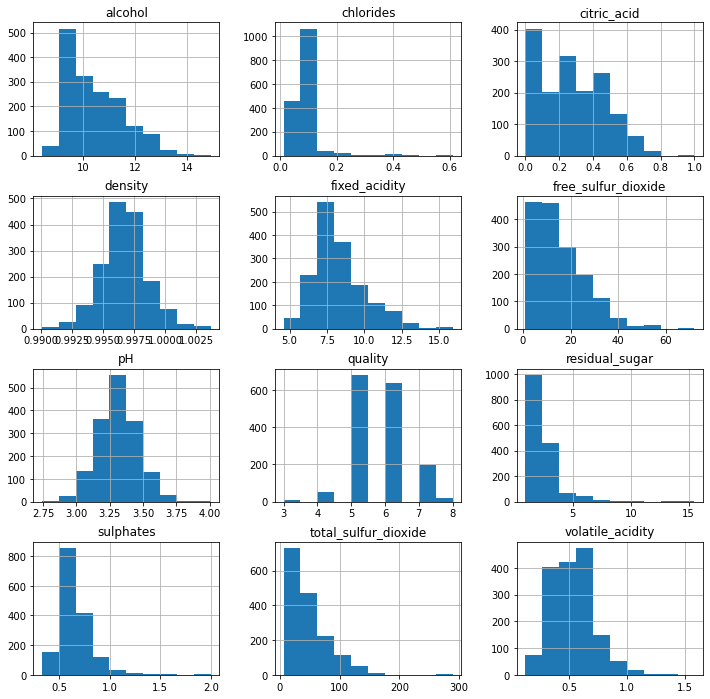

In [5]:
df.hist(); 

# most features are right screwed, e.g. free_sulfur_dioxide
# quality is an integer variable
# a few features show a normal distribution, e.g. pH

In [48]:
# Analyze the correlation between features and the target
correlation = (df[df.columns].corr()['quality'].sort_values(ascending=False)).drop('quality')
print(correlation)

# alcohol has highest correlation (0.48), volatile_acidity the second highest (-0.39)
# a few features seem don't show a correlation with the target variable, e.g. free_sulfur_dioxide

alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64


In [16]:
(df[df.columns].corr()['quality'][:].sort_values(ascending=False)).drop('quality') ##?

#[:] basically creates a copy of the original sequence.

alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

In [17]:
(df[df.columns].corr()['quality'].sort_values(ascending=False)).drop('quality')

alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

In [15]:
df[df.columns].corr()['quality']

fixed_acidity           0.124052
volatile_acidity       -0.390558
citric_acid             0.226373
residual_sugar          0.013732
chlorides              -0.128907
free_sulfur_dioxide    -0.050656
total_sulfur_dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [20]:
# Plotting the correlation is also possible.
# We take the liberty to showcase a new, handy, library that you might want to have on your list.
# It's called yellowbrick. You will need to pip-install the library before running the 
# below code. If you use conda, install the package by running:
# conda install -c conda-forge yellowbrick

# Using various libraries, each time picking the one most suitable for a task, is common in
# data science. If you find this approach yet a little confusing, you can also solve the 
# exercise using more standard tools. For example, we demonstrate correlation analysis
# and standard visualizations in Tutorial 4. 
from yellowbrick.target import FeatureCorrelation

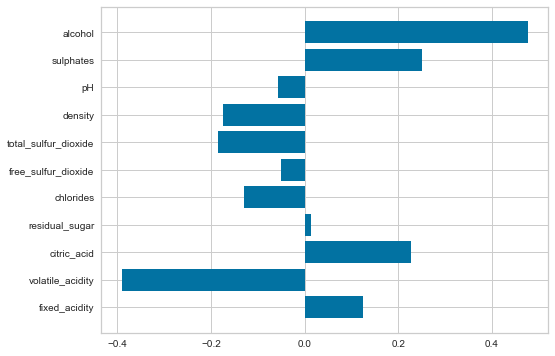

In [46]:
# Examine featture correlation with the target using the yellowbrick library
plt.figure(figsize=(8,6))  # not too big
features = df.columns.drop('quality')
corr = FeatureCorrelation(labels=features); #calculate the correlation
corr.fit(df[features], df['quality']); #ploting
#help(FeatureCorrelation)
# We promised a nice plot did we not ;) Compare the below plot to a standard correlation matrix and decide for yourself
# which one is easier to work with and when. 

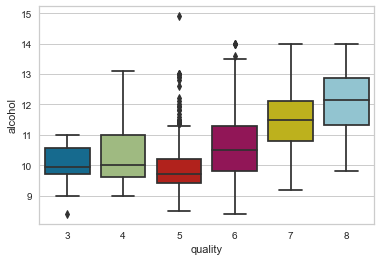

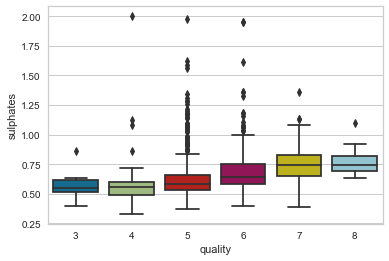

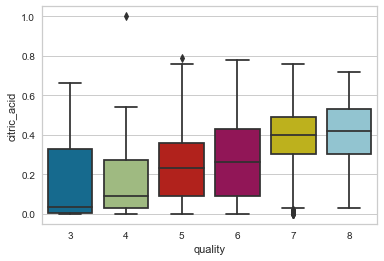

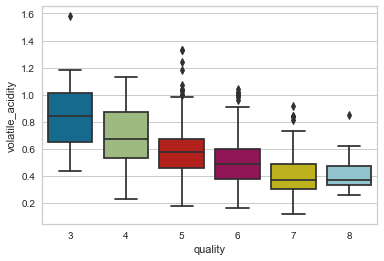

In [49]:
# Taking a closer look at the relationship of features with the target variable 
# that have a correlation higher than |0.2|
import seaborn as sns
                  
for i in (correlation.index[abs(correlation) > 0.2]):
  fig, ax = plt.subplots(figsize=(6,4))
  sns.boxplot(y= i, x='quality', data=df)
  
# We can see that some variables show more outliers than others, but generally detect a linear relationship.
# Some deviations appear, such as the relationship of alcohol and quality, where we can see a drop first, 
# and then a steady increase from the quality value of 5. This could suggest that we should nonlinearly 
# transform the feature alcohol before inputting it into a linear regression model.

## 2 Regression analysis (basic)
Let's try to model the quality of wine (target)  using the data about it's chemical compounds (features). Build a simple linear regression using the `statsmodels` library. Start only with two components that seem to have most influence. You should have got some ideas which variables might be important from your previous analysis of the data. Produce a regression table and discuss the results. How well does your model explain the target?



In [50]:
# First regression using only one feature.
# We pick the alcohol feature because it is most correlated with the target
from sklearn.linear_model import LinearRegression
x, y = df.alcohol, df.quality

In [51]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x)
results_1 = model.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           2.83e-91
Time:                        10:10:02   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.0

Findings: 
The r-squared value of our model is 0.227, which means there is still a lot of room for improvement. However, the P>|t|= 0.000 shows that the variable is significant and is suitable to describe the target variable. We will see how our output changes in the next task!

Above we found some evidence that the relationship between `alcohol` and `quality` might be nonlinear. Why don't you try to build another regression model in which you add a second input feature, which is a nonlinear transformation of `alcohol`? You could, for example, consider a second feature `alcohol^2`. Does it improve the regression?

In [89]:
#no

x = df.alcohol[:]
y = df.quality
x2=x**2

x3=pd.concat([x, x2], join= 'inner', axis=1)
#help(pd.concat)
x3.columns=['alcohol','alcohol^2']
x3.head(5)
x4 = sm.add_constant(x3)
model = sm.OLS(y, x4)
results1 = model.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     235.6
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           2.18e-90
Time:                        10:39:44   Log-Likelihood:                -1719.8
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1596   BIC:                             3462.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5357      1.528     -0.351      0.7

## 3 Full regression analysis 
Let's now  try to use all our features. Re-run the regression and check whether its results have improved. Which features seem to play major role? Do you observe any irrelevant features? Do the results our intuition after looking at correlation? Why could that be? Try out a few more variants of your regression model by discarding less informative features.  

In [21]:
# Codes for tasks 3.3
X = df[features]
X = sm.add_constant(X)

import statsmodels.api as sm
results_2 = sm.OLS(y, X).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.79e-145
Time:                        16:05:12   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

In [22]:
tmp = (results_2.pvalues <= 0.05)[1:]
print(features[tmp])
#tmp.pop()
#print(tmp)
#len(features)

Index(['volatile_acidity', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [23]:
# For model improvement, we chose to only incorporate variable with a significance level < 0.05
sig_index = (results_2.pvalues <= 0.05)[1:]  # the first element is the significance of the intercept
sig_features = features[sig_index]
X = df[sig_features]
X = sm.add_constant(X)

import statsmodels.api as sm
results_3 = sm.OLS(y, X).fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          5.32e-149
Time:                        16:05:14   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4301 

Well, our last change has increased the $R^2$ a little bit but decreased the AIC. When judging whether the removal of the insignificant variables has improved the model, recall that more parsimonious models are preferable. Therefore, essentially the same quality of fit but using less variables, the second model is better than the former one with all variables included. 

You will have seen some warning messages generated by the `statsmodels` when fitting the above regression model. We might still have problems with multicollinearity. Feel very free to go on and tune our regression model further.

## 4 Comparing regression models
Working on the previous tasks, you have created several regression models for the same data set. You would want to know which model is best for your data. Briefly state which regression statistics you consider to determine the most suitable model. Use this task as an opportunity for verifying that you are familiar with the statistics that the regression output table provides.  

Briefly state your answers to 3.4 as a bullet list:
- We were able to explain more of the target variable with the full regression model
- However, adding more variables will always lead to an improved prediction, eventhough there is not an actual relationship between the feature and target variable
- Chosing only highly siginificant variables, we still achieved a similar R-sqaured value
- The correlation analysed at the beginning can be seen in the β values of the regression analysis, e.g. both sulphates and alcohol are positive

## 5 Residual analysis
Having discussed the suitability of alternative regression models above, you will now be ready to pick your preferred model. Create a residual plot for this model. Briefly discuss the purposes of a residual plot and your findings.

In [24]:
# For start, we can calcualte the residuals of our model as follows
e = y - results_3.predict(X)
e

0      -0.024869
1      -0.125617
2      -0.198310
3       0.305525
4      -0.024869
          ...   
1594   -0.534544
1595    0.019549
1596    0.038178
1597   -0.489273
1598   -0.054757
Length: 1599, dtype: float64

In [25]:
# That was for demonstration but actually, manually calculating residuals is unneeded
# because the residuals and standardized residuals are directly available as a property 
# of the estimated regression object
results_3.resid  # residuals, equal to the above

0      -0.024869
1      -0.125617
2      -0.198310
3       0.305525
4      -0.024869
          ...   
1594   -0.534544
1595    0.019549
1596    0.038178
1597   -0.489273
1598   -0.054757
Length: 1599, dtype: float64

In [26]:
# For plotting, we typically use the standardized residulas, 
# ie standardized to have zero mean and unit variance
e = results_3.resid_pearson

# Let's verify these residuals are standardized
print("Mean (sd) of the standardized residuals are {}({})".format(e.mean(), e.std()))

Mean (sd) of the standardized residuals are -5.1613219986576384e-15(0.9974952997611836)


The residual plot depicts the (standardized) residuals (on the vertical axis) versus an independent variable (on the horizontal axis). We can easily create this plot ourselves using, for example, the independent variable *volatile_acidity*.

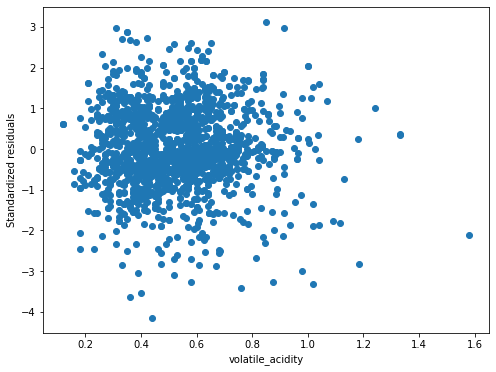

In [27]:
# Quick and dirty residuals plot 
ivar = "volatile_acidity"

plt.figure(figsize=(8,6))  # not too big
plt.scatter(X[ivar], results_3.resid_pearson)
plt.ylabel("Standardized residuals")
plt.xlabel(ivar)
plt.show()

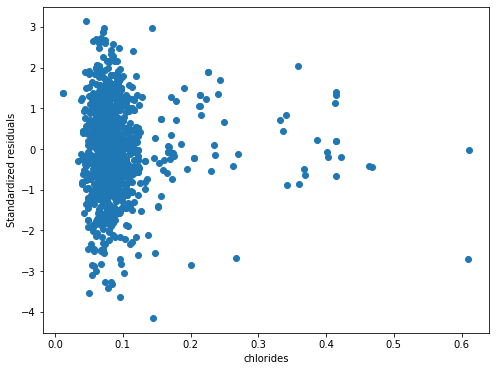

In [43]:
ivar = "chlorides"

plt.figure(figsize=(8,6))  # not too big
plt.scatter(X[ivar], results_3.resid_pearson)
plt.ylabel("Standardized residuals")
plt.xlabel(ivar)
plt.show()

We could easily extend the above code such that it creates a matrix of plots, one for each of the independent variables.

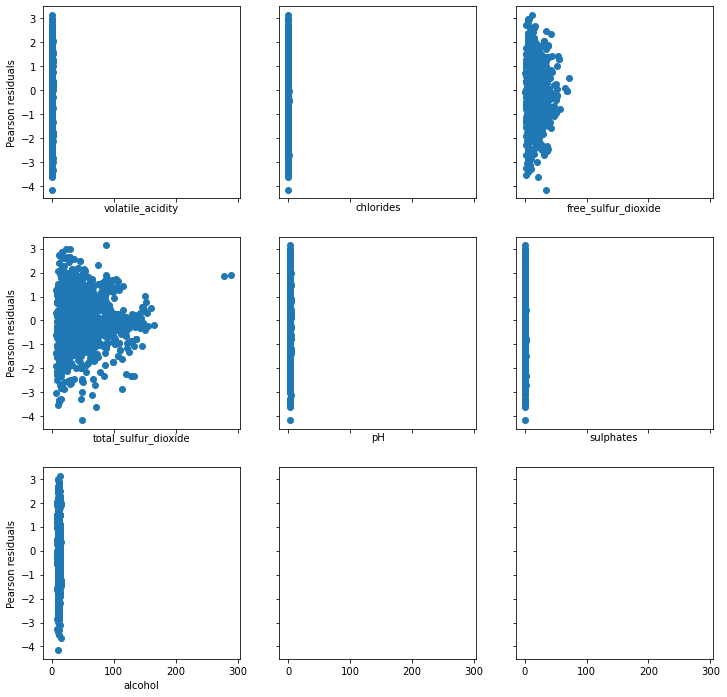

In [42]:
import numpy as np
import math
cols = X.columns[1:]

# Some code to configure plotting in a grid 
ncol = 3  # say we create 3 plots per row
nrow = math.ceil(len(cols) / ncol)  
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(12, 12), squeeze=0, sharex=True, sharey=True)
axes = np.array(axes)
for i, ax in enumerate(axes.reshape(-1)):
    if i == cols.shape[0]:
        break
    if i % ncol == 0:
        ax.set_ylabel('Pearson residuals')
    ax.set_xlabel(cols[i])
    ax.scatter(x=X[cols[i]], y=results_3.resid_pearson)

In [38]:
print(cols)

Index(['volatile_acidity', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol'],
      dtype='object')


Our task was also to interpret the plot. Basically, the purpose of analyzing residuals is to detect patterns that confirm or reject the suitability of the linear regression model. Examples include unequal variance (heteroscedasticity), auto-correlation. The suitability of linear regression is confirmed if residuals vary randomly around the zero line. If you appreciate an easy refresher on residual plots, you might want to check out [this webpage](https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/).

In the focal case, we know that linear regression is actually not a suitable model because our dependent variable is a quality score with distinct values. This inappropriateness is in the below plot, which shows another common variant of the residual plot in which we plot residuals against outcomes. We make use of some nice functionality from the `yellowbricks` package.

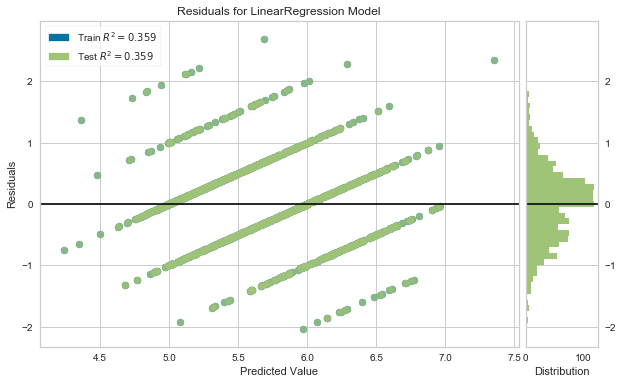

In [159]:
from yellowbrick.regressor import residuals_plot
from sklearn.linear_model import LinearRegression
plt.figure(figsize=(10,6))
viz = residuals_plot(LinearRegression(), X, y)

The way in which the `residuals_plot` function is designed requires inputting a `sklearn` objects, which is then trained on the data. You can also put in training and test data, deactivate the histogram or exchange it with a QQ plot, and some more. If interested, [here is an extended demo](https://www.scikit-yb.org/en/latest/api/regressor/residuals.html)). Following the link, you also find some more interested demos for visualizations, which related to future concepts like regularization (see `Alphaselection` and more generally functions for visualizing model selection results).

Finally, it is also worth mentioning that the `seaborn` library has some nice functionality for visualizing regression results. Examples include a residual a standard regression plot (`regplot`, [see here](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot)) or a residual plot (`residplot`, [see here](https://seaborn.pydata.org/generated/seaborn.residplot.html#seaborn.residplot)).

Finally, in case you wonder, yes the `statsmodels` library also features some standard approaches for regression and residual diagnostics. Detailed information is available [here](https://www.statsmodels.org/stable/examples/notebooks/generated/regression_plots.html#Single-Variable-Regression-Diagnostics). Below, we illustrate one such function for diagnosing a single independent variable. 

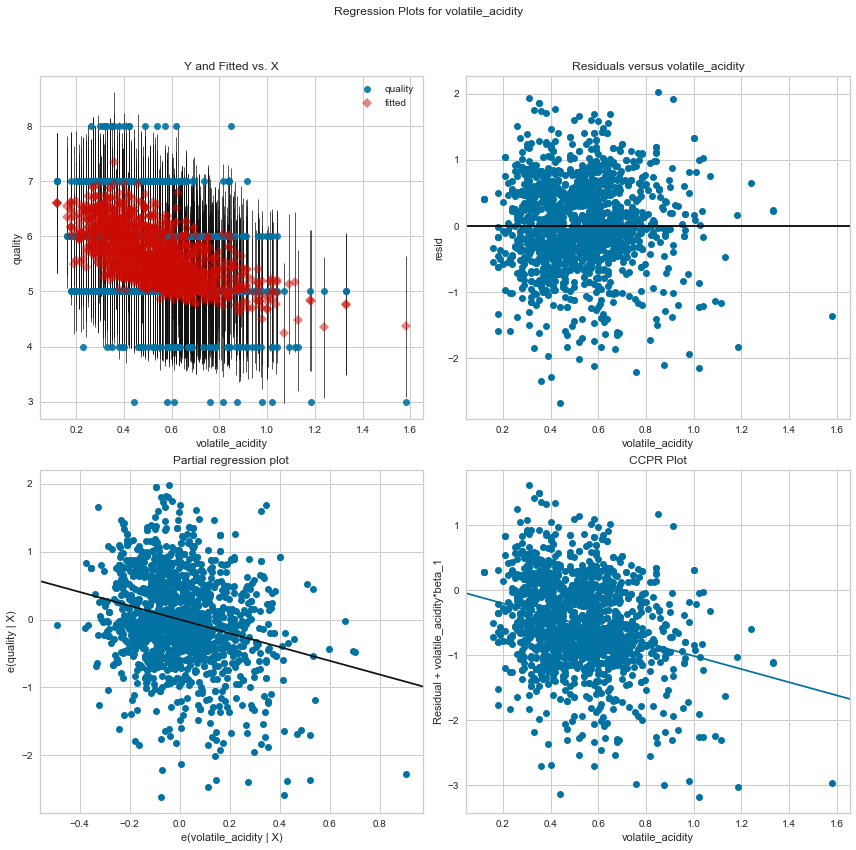

In [160]:
from statsmodels.graphics.regressionplots import plot_regress_exog

fig = sm.graphics.plot_regress_exog(results_3, "volatile_acidity")

The partial regression plot, lower left pane in the above chart, is also available for our multivariate regression. The purpose of this plot is to show the relationship between the response and a given independent variable after removing the effect of all other independent variables. Note how this is different from simply plotting the value of the target variable against that the values of the independent variable, as you would in a univariate regression. 

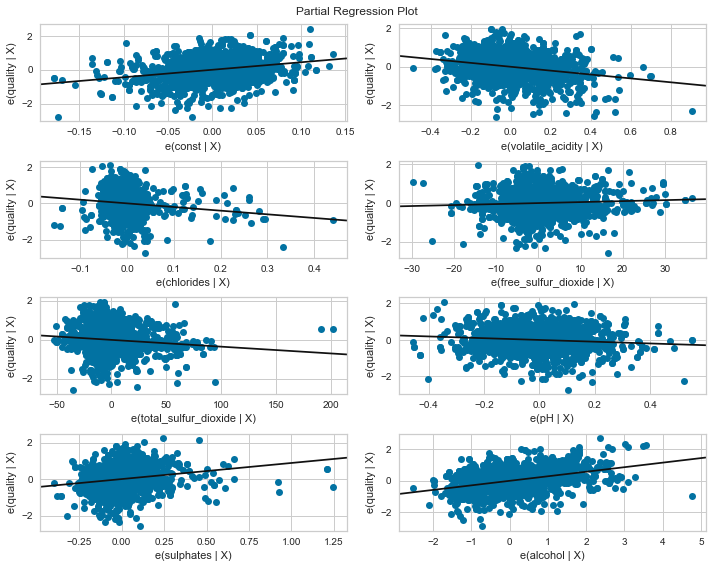

In [161]:
from statsmodels.graphics.regressionplots import plot_partregress_grid

fig = plt.figure(figsize=(10, 8))
plot_partregress_grid(results_3, fig=fig)
plt.show()

# Well done. You did great in solving all the exercises!